# TP Optique n°3 - Etude de la loi de Malus

Ce TP est consacré à l'étude quantitative de la loi de Malus, qui nécessite au préalable de s'intéresser à un capteur, la photodiode.
Ce TP se déroule sur deux séances consécutives. 

**Capacités mises en oeuvre**  :
* Identifier, à l’aide d’un polariseur, une onde polarisée rectilignement et déterminer sa direction de polarisation.
* Utiliser des polariseurs et étudier quantitativement la loi de Malus.

Le langage de programmation utilisé est le langage python.

In [1]:
import requests

f = open("montagephotodiode.jpg", "wb")
response = requests.get("https://ledourmorvan.github.io/Optique3-PhotodiodeMalus/montagephotodiode.jpg")
f.write(response.content)
f.close()
f = open("photodiode.jpg", "wb")
response = requests.get("https://ledourmorvan.github.io/Optique3-PhotodiodeMalus/photodiode.jpg")
f.write(response.content)
f.close()
f = open("malus.jpg", "wb")
response = requests.get("https://ledourmorvan.github.io/Optique3-PhotodiodeMalus/malus.jpg")
f.write(response.content)
f.close()

import os
os.listdir()

['montagephotodiode.jpg', 'photodiode.jpg', 'malus.jpg']

## I – Polaroïds et loi de Malus

Un Polaroïd (filtre polarisant) est une feuille de matière synthétique employée pour polariser rectilignement la lumière : le champ électrique de l’onde lumineuse qu’il transmet est caractérisé par une direction de vibration donnée (la direction de polarisation), orthogonale à la direction de propagation de l’onde.

Si on place sur le trajet de la lumière deux Polaroïds parfaits de même direction de polarisation, la lumière traversant le premier traverse aussi le second ; si les directions de polarisation ne sont plus parallèles et font un angle $\alpha$ entre elles, une partie de la
lumière traversant le premier Polaroïd est arrêtée par le second ; si les deux directions de polarisation sont orthogonales (les Polaroïds sont dits « croisés »), toute la lumière traversant le premier Polaroïd est arrêtée par le second.

On montre alors que l’intensité lumineuse (ou éclairement à un facteur près) sur un écran situé après les deux Polaroïds s’écrit
$$E=E_0\cos^2(\alpha)\ .$$
L'intensité est ici notée $E$ pour la distinguer de l’intensité électrique $I$.Cette loi est connue sous le nom de *loi de Malus*.

## II – La photodiode, capteur d'intensité lumineuse

L'étude expérimentale de la loi de Malus nécessite l'utilisation d'un
capteur d'intensité lumineuse.

### A : Circuit d'utilisation d'une photodiode

Le montage d’alimentation de la photodiode est le suivant :

![](filesystem:/photodiode.jpg)
<p style="text-align: center;">Figure n°1 : Circuit d'alimentation de la photodiode</p>

La photodiode doit être impérativement *polarisée en inverse*, de manière à ne pas être traversée par un courant d'intensité électrique
trop forte et sussceptible de détriorer le capteur. La tension constante $E=3\mbox{ V}$ est délivrée par une alimentation 12 V réglable (ou une alimentation de 15 V non réglable utilisée avec un diviseur de tension). 

### B : Intensité lumineuse reçue par la photodiode

L’intensité lumineuse $E$ reçue par la diode dépend de la puissance lumineuse émise par la source lumineuse et de la distance $d$ de la diode à cette source. En première approximation, la conservation de l’énergie lumineuse impose que
$$E\propto \frac{1}{d^2}\ .$$
Dans un premier temps, on souhaite vérifier que la photodiode est bien sensible à l'intensité lumineuse, c'est-à-dire contrôler si l'intensité
$I$ du courant qui traverse la photodiode est une fonction affine de $E$. Si c'est le cas alors 
$$I=I_0+\frac{K}{d^2}\ .$$

### C : Travail demandé (première séance)

1. Régler $E$, réaliser le montage électrique et le faire vérifier par votre professeur avant de le mettre sous tension.
2. Disposer la photodiode sur le banc optique et l’éclairer par la lanterne Jeulin alimentée en 12 V continu par l’alimentation Jeulin. La lanterne doit être orientée de sorte que le filament de l’ampoule soit directement visible sur la photodiode, sans que le condenseur de la lanterne soit interposé.

La distance qui sépare l’élément sensible de la photodiode au filament est notée $d = x − x_0$, où $x$ est la distance du support de la photodiode à celui de la lanterne. La longueur $x_0$ est mal connue, mais son ordre de grandeur peut être estimé visuellement.
En revanche, l’incertitude sur cette valeur est trop grande pour pouvoir en déduire ensuite $d$ en calculant $x − x_0$.

![](filesystem:/montagephotodiode.jpg)
<p style="text-align: center;">Figure n°2 : Montage d'étude de la photodiode</p>

3. Pour une dizaine de valeurs de $x$ comprises entre 20 et 150 cm, mesurer les intensités électriques $I$ dans la photodiode. On commencera par la plus faible des valeurs $x$. L’ampèremètre sera alors réglé sur le plus petit calibre admissible, calibre qui ne sera pas modifié dans la suite.
4. Enfin, dans l’obscurité, mesurer l’intensité $I_0$ traversant la diode.
5. Pour estimer les incertitudes sur l’intensité, on utilisera les notices : noter la formule utilisée pour calculer les incertitudes sur l’intensité.

Comme le modèle conduit à :
$$x = x_0 + \frac{K'}{\sqrt{I-I_0}}\ ,$$
on pourrait représenter $x$ en fonction de $\frac{1}{\sqrt{I-I_0}}$
et réaliser une régression linéaire afin d’estimer directement $x_0$. L’inconvénient est que les barres d’incertitudes seraient les plus importantes en abscisses, alors que pour une régression linéaire, 
elles doivent être nulles en abscisse.

C’est pourquoi on choisit de représenter
$Y = \frac{1}{\sqrt{I-I_0}}$ en fonction de $x$.
La régression linéaire conduit alors à
$$\frac{1}{\sqrt{I-I_0}}=ax+b=\frac{1}{K}(x-x_0)\ .$$
On trouve alors la pente $a = 1/K$ et l’ordonnée à l’origine $b = −x_0 /K$ de la droite de régression, soit $x_0 = −b/a$.
6. Compléter la cellule n°2 du programme python  ci-dessous.

In [1]:
#%% Cellule n°1 : importations

import numpy as np
from matplotlib import pyplot as plt
import statistics

In [2]:
#%% Cellule n°2 : mesure de I0, I et x

tab_x=np.array([,,,])             # Valeurs de x à saisir

I0=                                  # Valeur de IO à saisir
tab_I = np.array([,,,])                  # Valeurs de I

def incertitudeI(I):          # Saisir la formule de calcul des incertitudes sur I fournie par la notice.

tab_uI=incertitudeI(tab_I)                #Calcul des incertitudes pour toutes les valeurs de I  
uI0=incertitudeI(I0)                      #Calcul de l'incertitude sur I0  

7. Compléter la cellule n°3 pour ajouter la formule d'incertitudes sur $I$ et le calcul de $x_0$ et de son incertitude dans la boucle.
8. Exécuter successivement chaque cellule afin de visualiser la droite de régression, les résidus et les écarts normalisés.

In [3]:
#%% Cellule n°3 : regression linéaire

def ordonnee(I,I0):
    return 1/(abs(I-I0))**(1/2)                                                     # grandeur en abscisse  

def Regression(tab_x,tab_I, tab_uI, I0, uI0)   :
    N=1000
    d=len(tab_I)                                                               # Nombre de valeurs des couples (x,I)  
    tab_Y=np.zeros((N,d))                                                      # N simulations des d valeurs en ordonnée
    tab_a=np.zeros(N)                                                          # N simulations de l'ordonnée à l'origine de la droite de regression
    tab_b=np.zeros(N)                                                          # N simulations de la pente de la doite de regression
    tab_x0=np.zeros(N)                                                         # N simulations de x0
    t_ord=np.zeros(d)                                                          # d valeurs à mettre en ordonnée
    t_uord=np.zeros(d)                                                         # incertitudes (barres d'incertitudes) sur les d valeurs à mettre en ordonnée
    for i in range(N) :                                       
        simI0=np.random.normal(I0,uI0)                                         # simulation d'une valeur de IO
        simIi=np.random.normal(tab_I, tab_uI)                                  # simulation des d valeurs de I
        sim_Y=ordonnee(simIi,simI0)                                            # calcul des d valeurs simulées en ordonnée 
        coeff=np.polyfit(tab_x,sim_Y,1)                                        # regression linéaire sur un jeu de valeurs simulé
        tab_Y[i,:]=sim_Y[:]                                                    # stockage des valeurs simulées en ordonnées
        tab_a[i]=coeff[0]                                                      # stockage des ordonnées à l'origine simulées
        tab_b[i]=coeff[1]                                                      # stockage des pentes simulées
        tab_x0[i]=                                            # stockage des x0 simulées
    a=statistics.mean(tab_a)                                                   # calcul de la moyenne de l'ordonnée à l'origine
    b=statistics.mean(tab_b)                                                   # calcul de la moyenne sur la pente
    x0=statistics.mean(tab_x0)                                                 # calcul de la moyenne de x0
    ux0=statistics.pstdev(tab_x0)                                              # calcul de l'incertitude sur x0
    for i in range(d):
       t_ord[i]=statistics.mean(tab_Y[:,i])                                    # calcul de la moyenne de chacune des d valeurs à mettre en ordonnées
       t_uord[i]=statistics.pstdev(tab_Y[:,i])                                 # calcul des d barres d'incertitudes en ordonnées
    return a, b, x0, ux0,t_ord,t_uord

plt.clf()
plt.ylabel(r'$Y$')
plt.xlabel(r'$X$')

a, b, x0, ux0,t_ord,t_uord=Regression(tab_x,tab_I, tab_uI, I0, uI0) 

plt.errorbar(tab_x, t_ord, xerr =0, yerr = t_uord,fmt='o', linestyle='none',color = 'b', label = 'Points expérimentaux' )
plt.plot(tab_x, b+a*tab_x, label = 'Regression' )
plt.show()                                                    

print('x0= ',x0,' cm, avec une incertitude type de ',ux0,'cm.')

x0=  7.417259989197041  cm, avec une incertitude type de  3.712752233137084 cm.


In [4]:
#%% Cellule n°4 : résidus

plt.clf()
plt.ylabel(r'$Y$')
plt.xlabel(r'$X$')

plt.errorbar(tab_x, t_ord-(b+a*tab_x), xerr =0, yerr = t_uord,fmt='o', linestyle='none',color = 'b', label = 'Résidus' )
plt.show()                                                 

In [5]:
#%% Cellule n°5 écarts normalisés

plt.clf()
plt.ylabel(r'$Y$')
plt.xlabel(r'$X$')

plt.errorbar(tab_x, (t_ord-(b+a*tab_x))/t_uord, xerr =0, yerr = 0,fmt='o', linestyle='none',color = 'b', label = 'Ecarts normalisés' )
plt.fill_between(tab_x, 2,-2, color='0.9')                          
plt.show()                       

9. Commenter les résultats obtenus et la valeur de $x_0$ ainsi déterminée. Conclure.

## III – Etude quantitative de la loi de Malus (seconde séance)

1. Constituer le montage optique en plaçant deux Polaroïds et un écran orthogonalement au trajet de la lumière d’un laser.

2. En faisant tourner l’un des deux Polaroïds (toujours le même) autour de l’axe optique, mettre en évidence l’évolution qualitative de l’intensité lumineuse parvenant sur l’écran en fonction de $\alpha$.
    
3. Remplacer désormais l’écran par une photodiode convenablement alimentée (figure ci-dessous).

![](filesystem:/malus.jpg)
<p style="text-align: center;">Figure n°3 : Montage d'étude de la loi de Malus</p>
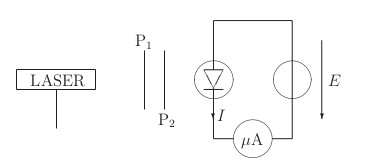

Comme lors de la séance précédente, la photodiode doit être impérativement *polarisée en inverse*, de manière à ne pas être traversée par un courant d'intensité électrique
trop forte et sussceptible de détriorer le capteur. La tension constante $E=3\mbox{ V}$ est délivrée par une alimentation 12 V réglable (ou une alimentation de 15 V non réglable utilisée avec un diviseur de tension).

4. Faire viser le circuit par le professeur avant de le mettre sous tension.

Lors de la séances précédente, on a constaté que l’éclairement $E$ est proportionnel à $I − I_0$ :
$$E = K(I − I 0 )\ ,$$
où $I$ est l’intensité du courant traversant la photodiode et $I_0$ l’intensité du courant d’obscurité (celui traversant la photodiode dans l’obscurité, très souvent nul).

**Remarques**

Il se peut que le laser utilisé soit partiellement polarisé et que la direction de polarisation fluctue. Cela se traduit alors par une lente variation de l’intensité lumineuse.
Si c’est le cas, faire alors les mesures au maximum d’intensité une fois les polaroïds réglés.
De plus, l’intensité électrique doit être toujours mesurée sur le même calibre.

5. Concevoir un protocole afin de vérifier la loi de Malus et le mettre en application.
6. Afin d'exploiter vos mesures, compléter la cellule n°6 ci-dessous, puis exécuter les cellules 1, 6 et 7 afin de  représenter $I − I_0$ en fonction de $\cos^2(\alpha)$. La cellule n°8 permet de visualiser les résidus et la cellule n° 9 les écarts normalisés.


In [6]:
#%% Cellule n°6 : mesure de I0, I et alpha

tab_alpha=np.array([,,,,,,,,,])  # Valeurs de alpha (en degres) à saisir
tab_x=np.cos(tab_alpha*np.pi/180)**2

I0=                                            # Valeur de IO à saisir
tab_I = np.array([,,,,,,,,,])       # Valeurs de I

def incertitudeI(I):
    return                       # Saisir la formule de calcul des incertitudes sur I fournie par la notice.

tab_uI=incertitudeI(tab_I)             #Calcul des incertitudes pour toutes les valeurs de I  
uI0=incertitudeI(I0)                   #Calcul de l'incertitude sur I0  

In [7]:
#%% Cellule n°7 : regression linéaire

def ordonnee2(I,I0):
    return I-I0                                                     # grandeur en abscisse  

def Regression2(tab_x,tab_I, tab_uI, I0, uI0)   :
    N=1000
    d=len(tab_I)                                                               # Nombre de valeurs des couples (x,I)  
    tab_Y=np.zeros((N,d))                                                      # N simulations des d valeurs en ordonnée
    tab_a=np.zeros(N)                                                          # N simulations de l'ordonnée à l'origine de la droite de regression
    tab_b=np.zeros(N)                                                          # N simulations de la pente de la doite de regression
    tab_x0=np.zeros(N)                                                         # N simulations de x0
    t_ord=np.zeros(d)                                                          # d valeurs à mettre en ordonnée
    t_uord=np.zeros(d)                                                         # incertitudes (barres d'incertitudes) sur les d valeurs à mettre en ordonnée
    for i in range(N) :                                       
        simI0=np.random.normal(I0,uI0)                                         # simulation d'une valeur de IO
        simIi=np.random.normal(tab_I, tab_uI)                                  # simulation des d valeurs de I
        sim_Y=ordonnee2(simIi,simI0)                                            # calcul des d valeurs simulées en ordonnée 
        coeff=np.polyfit(tab_x,sim_Y,1)                                        # regression linéaire sur un jeu de valeurs simulé
        tab_Y[i,:]=sim_Y[:]                                                    # stockage des valeurs simulées en ordonnées
        tab_a[i]=coeff[0]                                                      # stockage des ordonnées à l'origine simulées
        tab_b[i]=coeff[1]                                        # stockage des x0 simulées
    a=statistics.mean(tab_a)                                                   # calcul de la moyenne de l'ordonnée à l'origine
    b=statistics.mean(tab_b)                                                  # calcul de la moyenne de x0
    ub=statistics.pstdev(tab_b)                                              # calcul de l'incertitude sur x0
    for i in range(d):
       t_ord[i]=statistics.mean(tab_Y[:,i])                                    # calcul de la moyenne de chacune des d valeurs à mettre en ordonnées
       t_uord[i]=statistics.pstdev(tab_Y[:,i])                                 # calcul des d barres d'incertitudes en ordonnées
    return a, b, ub ,t_ord,t_uord

plt.clf()
plt.ylabel(r'$I-I_0$ (en ?)')
plt.xlabel(r'$\cos^2(\alpha)$')

a, b,ub,t_ord,t_uord=Regression2(tab_x,tab_I, tab_uI, I0, uI0) 

plt.errorbar(tab_x, t_ord, xerr =0, yerr = t_uord,fmt='o', linestyle='none',color = 'b', label = 'Points expérimentaux' )
plt.plot(tab_x, b+a*tab_x, label = 'Regression' )
plt.show()                                                    

print('b= ',b,' avec une incertitude type de ',ub)

b=  -0.21161472561028571  avec une incertitude type de  0.6717027296229643


In [8]:
#%% Cellule n°8 : résidus

plt.clf()
plt.ylabel(r'$I-I_0$ (en ?)')
plt.xlabel(r'$\cos^2(\alpha)$')

plt.errorbar(tab_x, t_ord-(b+a*tab_x), xerr =0, yerr = t_uord,fmt='o', linestyle='none',color = 'b', label = 'Résidus' )
plt.show()                                                 

In [9]:
#%% Cellule n°9 écarts normalisés

plt.clf()
plt.ylabel(r'$I-I_0$ (en ?)')
plt.xlabel(r'$\cos^2(\alpha)$')

plt.errorbar(tab_x, (t_ord-(b+a*tab_x))/t_uord, xerr =0, yerr = 0,fmt='o', linestyle='none',color = 'b', label = 'Ecarts normalisés' )
plt.fill_between(tab_x, 2,-2, color='0.9')                          
plt.show()     